# WeatherPy

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

Call current weather data for ONE location: <br>
api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [3]:
# Check if URL and API key works for the city of London...
test_url = f'http://api.openweathermap.org/data/2.5/weather?q=london&appid={weather_api_key}'
test_response = requests.get(test_url)
print(test_response)

<Response [200]>


In [4]:
# Check json format
test_response.json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 273.92,
  'feels_like': 269.35,
  'temp_min': 273.71,
  'temp_max': 274.26,
  'pressure': 1024,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 230},
 'clouds': {'all': 0},
 'dt': 1615177682,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1615185018,
  'sunset': 1615225950},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# set up lists to hold reponse info
name = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
dt = []

# log count
count = 0
set_count = 1

In [8]:
print('''
Beginning Data Retrieval
------------------------------------------------
''')

# Loop through the list of cities and perform a request for data
# Handle exceptions for a city that is not available in the WeatherMap API
for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
             
        count += 1
        print(f'Processing Record {count} | {city}')

    except:
        print(f'{city} not found. Skipping...')
        pass

print('''
------------------------------------------------
Data Retrieval Complete
------------------------------------------------
''')


Beginning Data Retrieval
------------------------------------------------

Processing Record 1 | busselton
halalo not found. Skipping...
tsihombe not found. Skipping...
Processing Record 2 | souillac
Processing Record 3 | askiz
Processing Record 4 | san patricio
Processing Record 5 | berlevag
Processing Record 6 | verkhoyansk
Processing Record 7 | albany
Processing Record 8 | venado tuerto
Processing Record 9 | saint-augustin
Processing Record 10 | rikitea
Processing Record 11 | port alfred
Processing Record 12 | tagusao
Processing Record 13 | punta arenas
Processing Record 14 | itoman
Processing Record 15 | buraydah
Processing Record 16 | deer lake
Processing Record 17 | lahan
Processing Record 18 | uray
Processing Record 19 | sola
Processing Record 20 | yellowknife
Processing Record 21 | guerrero negro
Processing Record 22 | klaksvik
Processing Record 23 | atuona
haibowan not found. Skipping...
Processing Record 24 | skibbereen
Processing Record 25 | barra
Processing Record 26 | ush

Processing Record 224 | irbeyskoye
Processing Record 225 | verkhnevilyuysk
Processing Record 226 | kurilsk
Processing Record 227 | port hardy
Processing Record 228 | whitianga
Processing Record 229 | bjornevatn
Processing Record 230 | ndele
Processing Record 231 | taoudenni
Processing Record 232 | zaragoza
Processing Record 233 | heihe
tumannyy not found. Skipping...
Processing Record 234 | general pico
Processing Record 235 | suileng
Processing Record 236 | ibipora
Processing Record 237 | alice springs
Processing Record 238 | westport
Processing Record 239 | gold coast
Processing Record 240 | jaicos
Processing Record 241 | dwarka
Processing Record 242 | los llanos de aridane
Processing Record 243 | muros
Processing Record 244 | biltine
Processing Record 245 | lata
formoso do araguaia not found. Skipping...
palabuhanratu not found. Skipping...
Processing Record 246 | sibolga
Processing Record 247 | sulangan
Processing Record 248 | davlekanovo
Processing Record 249 | niquero
Processing 

Processing Record 451 | gobabis
Processing Record 452 | suslovo
Processing Record 453 | fairbanks
Processing Record 454 | arlit
Processing Record 455 | iskateley
Processing Record 456 | daru
Processing Record 457 | severnoye
Processing Record 458 | acapulco
Processing Record 459 | khorixas
Processing Record 460 | kysyl-syr
Processing Record 461 | ardakan
Processing Record 462 | nanortalik
Processing Record 463 | charleville-mezieres
Processing Record 464 | pathein
Processing Record 465 | hakui
Processing Record 466 | puerto escondido
Processing Record 467 | constitucion
Processing Record 468 | jinhua
Processing Record 469 | urumqi
Processing Record 470 | hambantota
Processing Record 471 | liverpool
Processing Record 472 | snasa
Processing Record 473 | robertson
Processing Record 474 | rajakhera
Processing Record 475 | hammond
Processing Record 476 | tura
Processing Record 477 | teya
Processing Record 478 | ntcheu
Processing Record 479 | ngorongoro
Processing Record 480 | poum
Processin

## Convert Raw Data to DataFrame

Export the city data into a .csv
Display the DataFrame <br>

In [10]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)
weather_data['Date'] = pd.to_datetime(weather_data['Date'],unit='s')

In [11]:
weather_data.to_csv("./output_data/cities.csv", encoding="utf-8", index=False, header=True)

In [12]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,71.01,70,97,3.00,AU,2021-03-08 04:38:42
1,Souillac,-20.5167,57.5167,80.60,83,20,6.91,MU,2021-03-08 04:28:51
2,Askiz,53.1319,90.5264,26.37,95,84,1.88,RU,2021-03-08 04:38:43
3,San Patricio,28.0170,-97.5169,61.00,77,90,10.36,US,2021-03-08 04:38:43
4,Berlevåg,70.8578,29.0864,19.40,73,20,9.22,NO,2021-03-08 04:38:43
...,...,...,...,...,...,...,...,...,...
551,Cap Malheureux,-19.9842,57.6142,80.01,82,58,3.00,MU,2021-03-08 04:41:01
552,Yokadouma,3.5167,15.0500,66.54,70,99,2.10,CM,2021-03-08 04:41:02
553,Trofors,65.5333,13.4063,33.80,93,75,9.22,NO,2021-03-08 04:41:02
554,Sakakah,29.9697,40.2064,51.80,40,0,6.91,SA,2021-03-08 04:41:02


In [13]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,20.971753,22.729722,52.275827,73.325540,50.302158,7.701151
std,32.909179,92.667015,29.275010,21.069772,39.590454,4.863561
min,-54.800000,-179.166700,-26.950000,10.000000,0.000000,0.630000
25%,-6.534150,-58.836775,30.150000,64.000000,4.000000,4.000000
50%,23.566700,27.639900,60.800000,79.000000,50.000000,6.790000
75%,49.633125,108.060150,77.055000,89.000000,90.000000,10.360000
max,78.218600,179.316700,97.410000,100.000000,100.000000,32.280000


## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [14]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,20.971753,22.729722,52.275827,73.325540,50.302158,7.701151
std,32.909179,92.667015,29.275010,21.069772,39.590454,4.863561
min,-54.800000,-179.166700,-26.950000,10.000000,0.000000,0.630000
25%,-6.534150,-58.836775,30.150000,64.000000,4.000000,4.000000
50%,23.566700,27.639900,60.800000,79.000000,50.000000,6.790000
75%,49.633125,108.060150,77.055000,89.000000,90.000000,10.360000
max,78.218600,179.316700,97.410000,100.000000,100.000000,32.280000


#### Max humidity result from the summary statistics shows 100%

In [15]:
# double check max value of humidity from the weather_data
weather_data['Humidity'].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

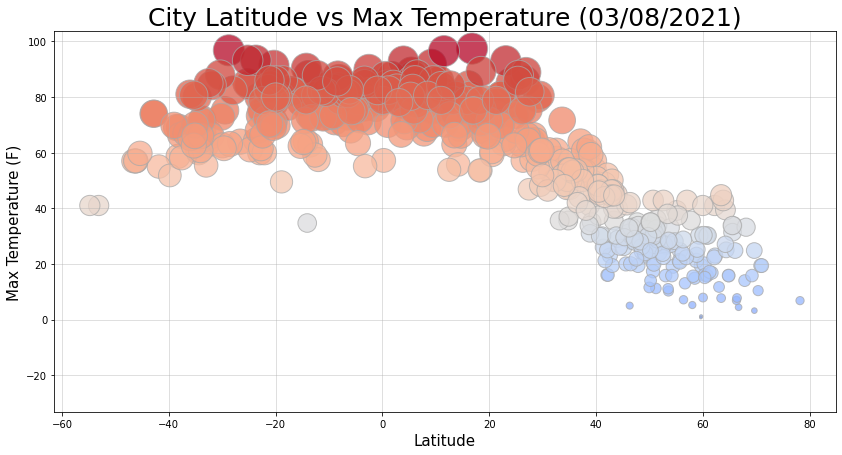

In [17]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values, s=10*y_values, c=y_values, edgecolors='darkgrey', cmap='coolwarm', alpha=.75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('City Latitude vs Max Temperature (03/08/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Temp')
plt.show()

The City Latitude vs Max Temperature scatterplot shows a trend of decline on temeperature for cities in the northern latitude. Cities within range of 0-20 latitude, which is slightly above the equator, shows the highest max fareinheit temperature.

### Latitude vs. Humidity Plot

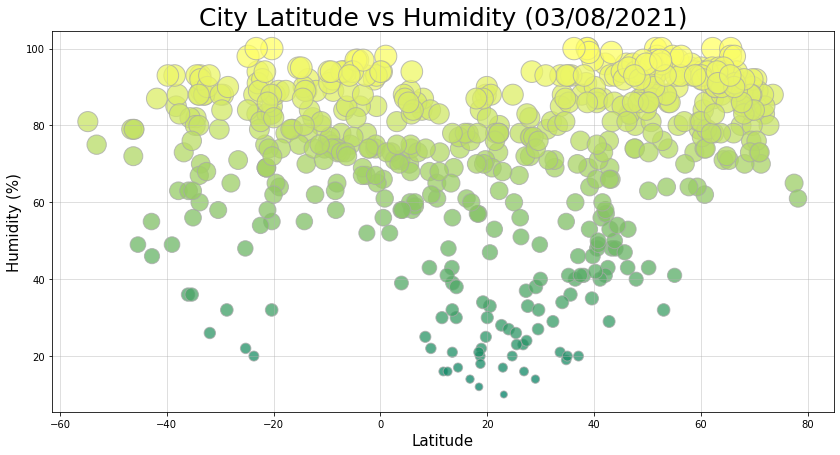

In [20]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values,s=5*y_values, c=y_values, edgecolors='darkgrey', cmap='summer', alpha=.75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('City Latitude vs Humidity (03/08/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Hum')
plt.show()

The City Latitude vs Humidity scatterplot shows high humidity rate doesn't have any correlation on where the city latitude falls into. However comparing the number of cities that has high humidity rate vs number of city with low humitdity rate, the plot shows that there are more number of cities that has higher humidity rate, which is 60%. 


### Latitude vs. Cloudiness Plot

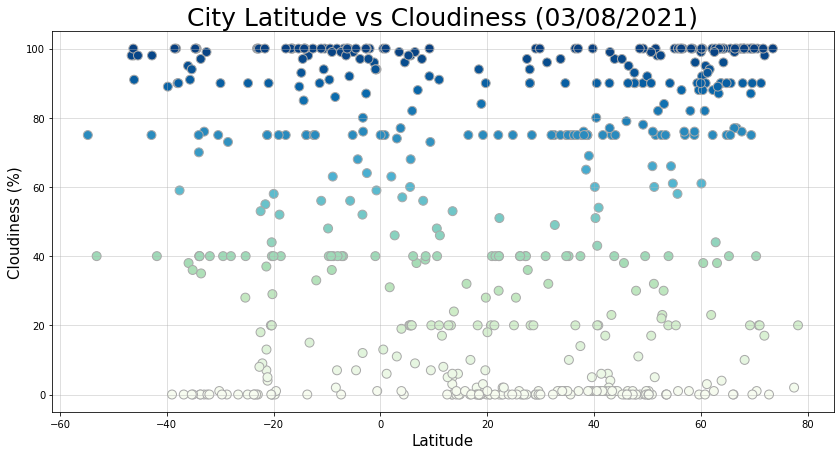

In [22]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values, s=80, c=y_values, edgecolors='darkgrey', cmap='GnBu')
plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('City Latitude vs Cloudiness (03/08/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Cloud')
plt.show()

The City Latitude vs Cloudiness scatterplot shows rate of cloudiness doesn't have any correlation on where the city latitude falls into. However, the plot shows most cities either have really low rate or really high rate of cloudiness, as compare to an average clousiness rate. 

### Latitude vs. Wind Speed Plot

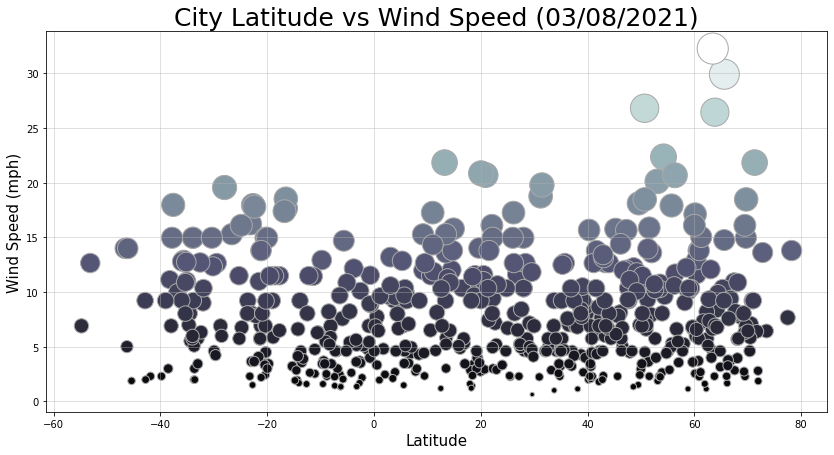

In [23]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values, s=30*y_values, c=y_values, edgecolors='darkgrey', cmap='bone')
plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('City Latitude vs Wind Speed (03/08/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Wind')
plt.show()

The City Latitude vs Wind Speed scatterplot shows rate of wind speed tends to be slightly higher on the norther part of hemisphere.

## Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
NHemisphere = weather_data.loc[weather_data['Lat'] > 0]

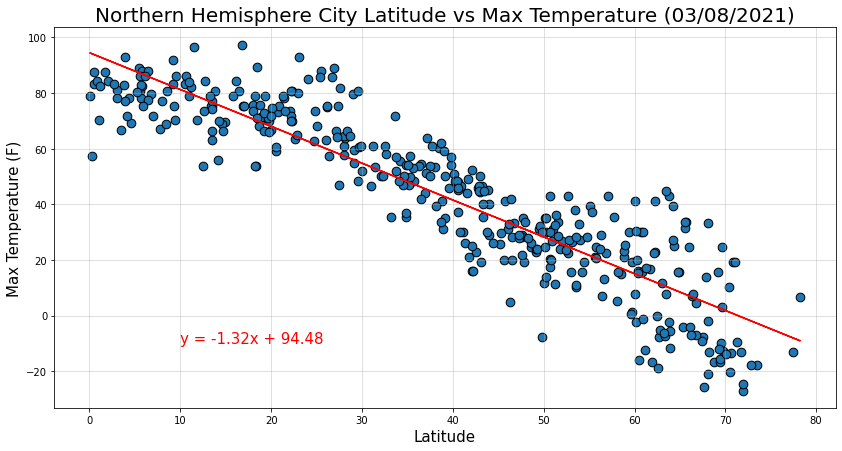

The r-value is: -0.9075391665747956


In [26]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('Northern Hemisphere City Latitude vs Max Temperature (03/08/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Temp-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
SHemisphere = weather_data.loc[weather_data['Lat'] < 0]

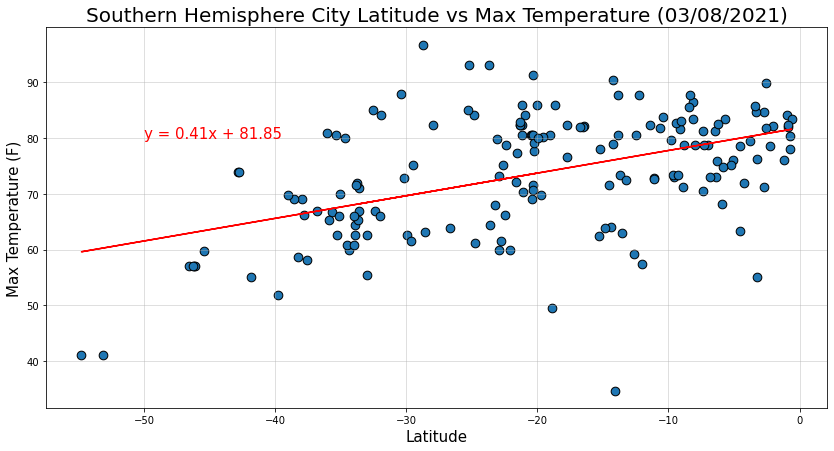

The r-value is: 0.48629788066860324


In [29]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('Southern Hemisphere City Latitude vs Max Temperature (03/08/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Temp-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere - Temperature (F) vs. Latitude Comparison

- N. Hemisphere shows a strong negative linear association between the temperature and latitude.
- S. Hemisphere shows a moderetaly positive linear association between the temperature and latitude with a few potential outliers. 

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

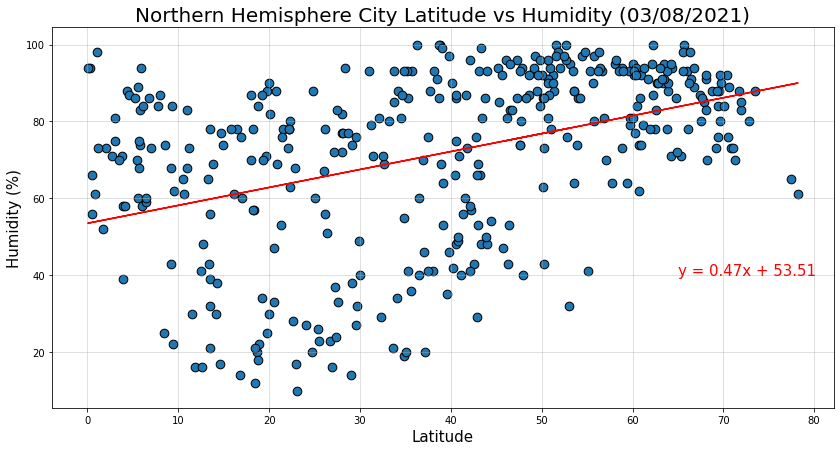

The r-value is: 0.4181300830702398


In [30]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(65,40),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('Northern Hemisphere City Latitude vs Humidity (03/08/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Hum-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

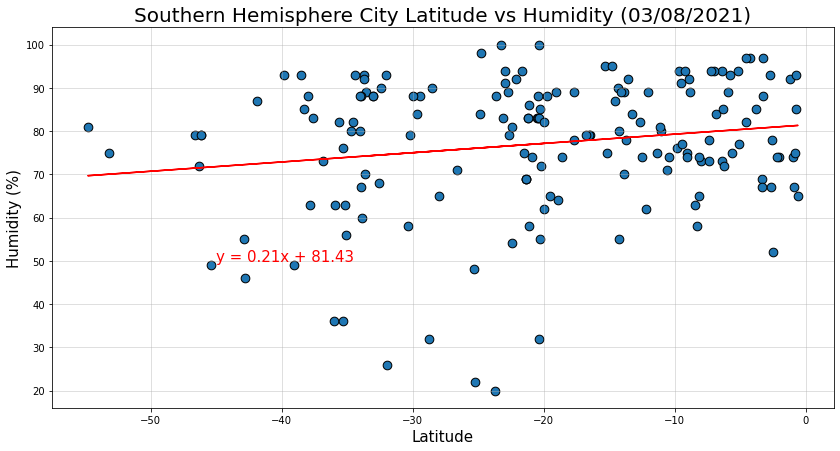

The r-value is: 0.17709431217300967


In [31]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,50),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('Southern Hemisphere City Latitude vs Humidity (03/08/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Hum-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere - Temperature (F) vs. Humidity Comparison

- N. Hemisphere shows a weak positive linear association between the humidity and latitude. The closer to the equator, the greater the outliers.
- S. Hemisphere shows a very weak positive linear association between the temperature and latitude with a few outliers. 

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

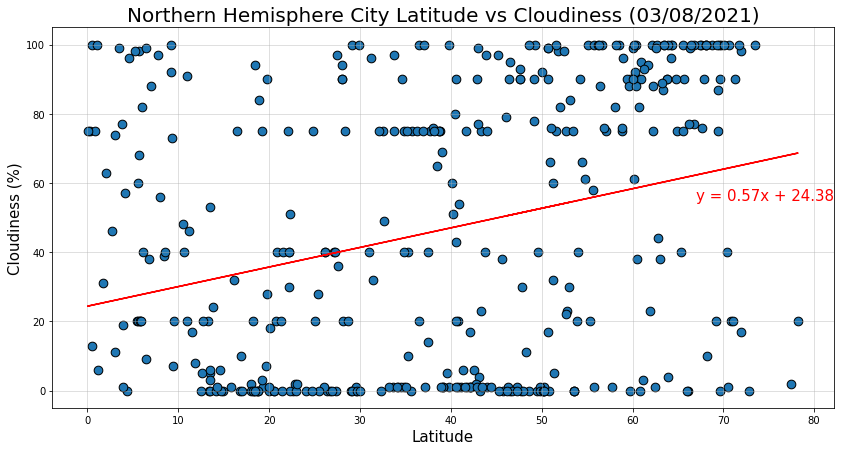

The r-value is: 0.29198612379267797


In [32]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(67,55),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('Northern Hemisphere City Latitude vs Cloudiness (03/08/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Cloud-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

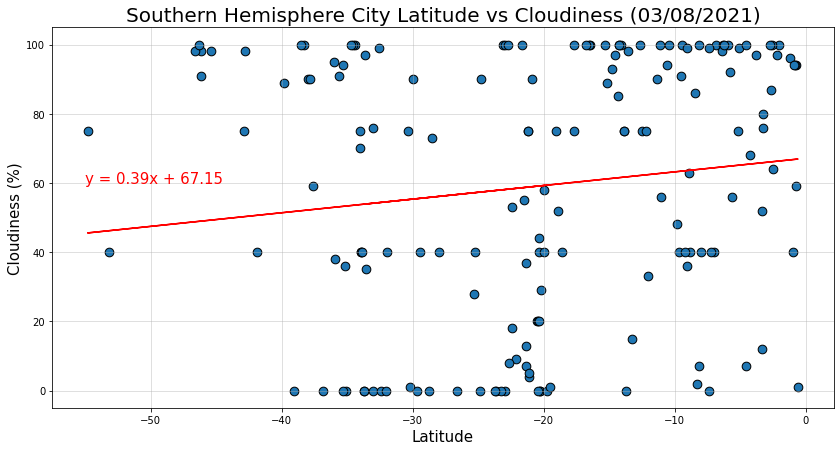

The r-value is: 0.13386009913637564


In [34]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('Southern Hemisphere City Latitude vs Cloudiness (03/08/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Cloud-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere -  Cloudiness (%) vs. Latitude Comparison

- N. Hemisphere shows a weak positive linear association between the cloudiness and latitude.
- S. Hemisphere shows a very weak positive linear association between the cloudiness and latitude.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

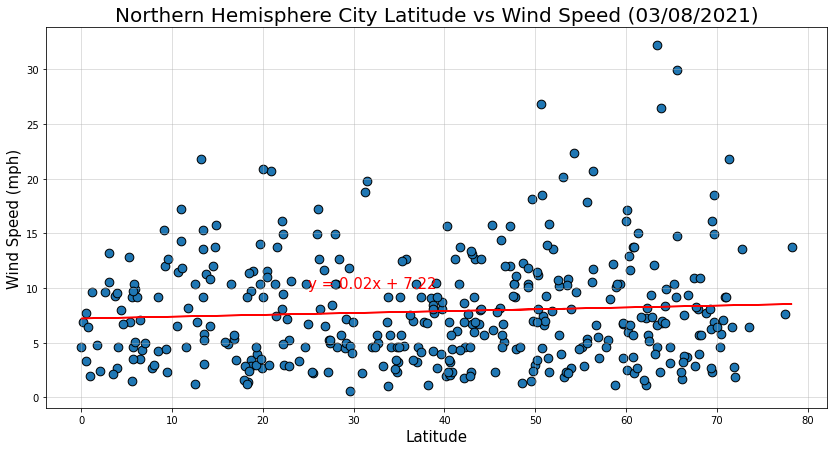

The r-value is: 0.06953129063400706


In [35]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('Northern Hemisphere City Latitude vs Wind Speed (03/08/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Wind-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

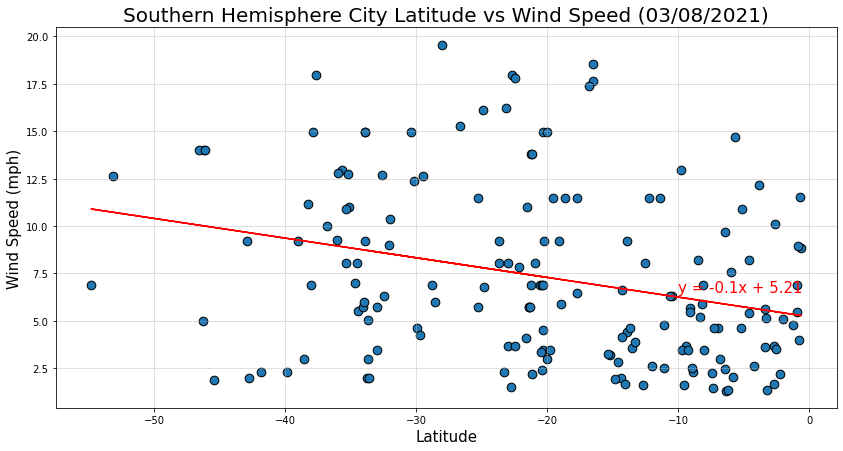

The r-value is: -0.29148956264376114


In [36]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,6.5),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('Southern Hemisphere City Latitude vs Wind Speed (03/08/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Wind-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere - Latitude vs Wind Speed Comparison

- N. Hemisphere shows no relationship between the latitude and the wind speed.
- S. Hemisphere shows a very weak negative linear association between the latitude.